In [22]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
df = pd.read_csv('raw_sales.csv')
df.head()
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


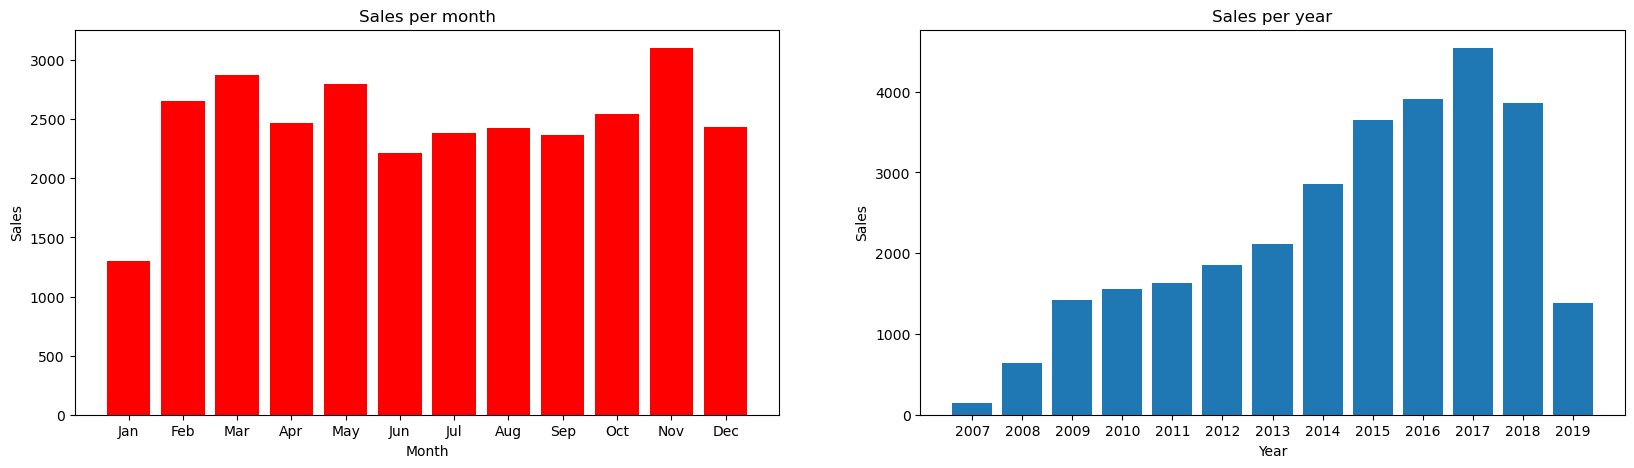

In [101]:
month = pd.to_datetime(df["datesold"]).dt.month.value_counts()
month.sort_index(ascending=True, inplace=True)
year = pd.to_datetime(df["datesold"]).dt.year.value_counts()
year.sort_index(ascending=True, inplace=True)
month_lst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
              'Sep', 'Oct', 'Nov', 'Dec']
year_lst = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].bar(month_lst, month, color='red')
axes[0].set_title('Sales per month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[1].bar(year_lst, year)
axes[1].set_title('Sales per year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
fig